# Movie rating prediction using diffrent algo

### Data preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\admin\\Downloads\\movies_data.csv', encoding='ISO-8859-1')


In [3]:
df.sample(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
2779,Kaun Kare Kurbanie,1991,154,"Action, Crime, Drama",3.2,49,Arjun Hingorani,Dharmendra,Govinda,Anita Raj
1677,Ek Se Bure Do,2009,180,"Action, Comedy, Crime",4.3,62,Tariq Khan,Anita,Lankesh Bhardwaj,Snehal Dabi
2241,Humraaz,2002,173,"Action, Musical, Romance",6.4,3207,Abbas Alibhai Burmawalla,Mastan Alibhai Burmawalla,Bobby Deol,Akshaye Khanna
4537,Santa Banta Pvt Ltd,2016,112,"Comedy, Crime, Drama",2.8,247,Akashdeep,Boman Irani,Vir Das,Neha Dhupia
4653,Shaitani Ilaaka,1990,128,Horror,4.8,51,Kiran Ramsay,Sunil Dhawan,Shehnaz Kudia,Neelam Mehra
3372,Mee Sindhutai Sapkal,2010,110,"Biography, Drama",6.9,126,Ananth Narayan Mahadevan,Jyoti Chandekar,Ameya Hunaswadkar,Neena Kulkarni
4254,Rakhwale,1994,135,Action,2.9,20,Sudharshan Lal,Mukesh Khanna,Aatish Devgan,Harsha Mehra
4890,Sultan,2016,170,"Action, Drama, Sport",7.0,41777,Ali Abbas Zafar,Salman Khan,Kubbra Sait,Anushka Sharma
3530,Mr. Azaad,1994,123,"Action, Comedy, Drama",4.2,95,Rama Rao Tatineni,Anil Kapoor,Niki Walia,Ishrat Ali
128,Aaghaaz,2000,153,"Action, Crime, Drama",4.2,274,Yogesh Ishwar,Sunil Shetty,Sushmita Sen,Namrata Shirodkar


In [4]:
df.shape


(5659, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 442.2+ KB


In [6]:
df['Year'].value_counts()

Year
2019    227
2017    211
2018    202
2015    177
2016    173
       ... 
1931      2
1939      2
1934      2
1933      1
1932      1
Name: count, Length: 91, dtype: int64

In [7]:
df['Name'].value_counts()
df['Name'].unique()

array(['#Gadhvi (He thought he was Gandhi)', '#Yaaram',
       '...Aur Pyaar Ho Gaya', ..., 'Zulm Ki Zanjeer', 'Zulmi',
       'Zulm-O-Sitam'], dtype=object)

### Feature engineering 

In [8]:
df['Name'] = df['Name'].str.replace(r'\(.*\)', '', regex=True)

In [9]:
df['Name']

0                   #Gadhvi 
1                    #Yaaram
2       ...Aur Pyaar Ho Gaya
3                  ...Yahaan
4         ?: A Question Mark
                ...         
5654                  Zubaan
5655                Zubeidaa
5656         Zulm Ki Zanjeer
5657                   Zulmi
5658            Zulm-O-Sitam
Name: Name, Length: 5659, dtype: object

In [10]:
df['Name']=df['Name'].str.replace('#', '').str.replace('?', '').str.replace(':', '')

In [11]:
df['Name']

0                    Gadhvi 
1                     Yaaram
2       ...Aur Pyaar Ho Gaya
3                  ...Yahaan
4            A Question Mark
                ...         
5654                  Zubaan
5655                Zubeidaa
5656         Zulm Ki Zanjeer
5657                   Zulmi
5658            Zulm-O-Sitam
Name: Name, Length: 5659, dtype: object

In [12]:
df['Genre'].value_counts()

Genre
Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: count, Length: 376, dtype: int64

In [13]:
# Drama,Romance,Action,Crime,Comedy,Musical,Historical,Sports,Animation,Documentation,Biography

In [14]:
df['Comedy'] = df['Genre'].apply(lambda x: 1 if 'Comedy' in x else 0)
df['Drama'] = df['Genre'].apply(lambda x: 1 if 'Drama' in x else 0)
df['Romance'] = df['Genre'].apply(lambda x: 1 if 'Romance' in x else 0)
df['Action'] = df['Genre'].apply(lambda x: 1 if 'Action' in x else 0)
df['Crime'] = df['Genre'].apply(lambda x: 1 if 'Crime' in x else 0)
df['Musical'] = df['Genre'].apply(lambda x: 1 if 'Musical' in x else 0)
df['His'] = df['Genre'].apply(lambda x: 1 if 'History' in x else 0)
df['Sports'] = df['Genre'].apply(lambda x: 1 if 'Sport' in x else 0)
df['Animation'] = df['Genre'].apply(lambda x: 1 if 'Animation' in x else 0)
df['Documentation'] = df['Genre'].apply(lambda x: 1 if 'Documentary' in x else 0)
df['Biography'] = df['Genre'].apply(lambda x: 1 if 'Biography' in x else 0)

In [15]:
df.sample(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Drama,Romance,Action,Crime,Musical,His,Sports,Animation,Documentation,Biography
2232,Hum Tumhare Hain Sanam,2002,174,"Drama, Romance",5.4,6610,K.S. Adiyaman,Shah Rukh Khan,Madhuri Dixit,Salman Khan,...,1,1,0,0,0,0,0,0,0,0
3251,Main Chup Rahungi,1962,147,"Drama, Family",7.4,48,A. Bhimsingh,Sunil Dutt,Meena Kumari,Raj Mehra,...,1,0,0,0,0,0,0,0,0,0
261,Achhut Kanya,1936,142,"Drama, Musical, Romance",6.5,114,Franz Osten,Devika Rani,Ashok Kumar,Monorama,...,1,1,0,0,1,0,0,0,0,0
245,Ab Tumhare Hawale Watan Saathiyo,2004,193,"Action, Drama, War",4.6,1494,Anil Sharma,Sanjay Sharma,Amitabh Bachchan,Akshay Kumar,...,1,0,1,0,0,0,0,0,0,0
5118,The Good Road,2013,92,Drama,6.1,532,Gyan Correa,Ajay Gehi,Sonali Kulkarni,Shamji Dhana Kerasia,...,1,0,0,0,0,0,0,0,0,0
5503,Woh Jo Hasina,1983,121,Romance,4.6,10,Deepak Bahry,Mithun Chakraborty,Ranjeeta Kaur,Pran,...,0,1,0,0,0,0,0,0,0,0
1777,Foto,2007,86,Comedy,6.4,23,Virendra Saini,Tom Alter,Sameer Gupta,Arjun Gokul Jaykrishna,...,0,0,0,0,0,0,0,0,0,0
2432,Jai Santoshi Maa,1975,145,"Drama, Fantasy",6.2,118,Vijay Sharma,Bharat Bhushan,Ashish Kumar,Kanan Kaushal,...,1,0,0,0,0,0,0,0,0,0
2769,Katha,1983,141,"Comedy, Drama",7.8,1113,Sai Paranjape,Naseeruddin Shah,Farooq Shaikh,Deepti Naval,...,1,0,0,0,0,0,0,0,0,0
5639,Zindagi,1976,139,"Drama, Romance",6.8,26,Ravi Tandon,Mala Sinha,Sanjeev Kumar,Vinod Mehra,...,1,1,0,0,0,0,0,0,0,0


In [16]:
df['Drama'].value_counts()

Drama
1    3796
0    1863
Name: count, dtype: int64

In [17]:
df['Romance'].value_counts()

Romance
0    4279
1    1380
Name: count, dtype: int64

In [18]:
df['Action'].value_counts()

Action
0    3973
1    1686
Name: count, dtype: int64

In [19]:
df['Comedy'].value_counts()

Comedy
0    4315
1    1344
Name: count, dtype: int64

In [20]:
df['Crime'].value_counts()

Crime
0    4784
1     875
Name: count, dtype: int64

In [21]:
df['Musical'].value_counts()

Musical
0    5247
1     412
Name: count, dtype: int64

In [22]:
df['His'].value_counts()

His
0    5560
1      99
Name: count, dtype: int64

In [23]:
df['Sports'].value_counts()

Sports
0    5619
1      40
Name: count, dtype: int64

In [24]:
df['Animation'].value_counts()

Animation
0    5619
1      40
Name: count, dtype: int64

In [25]:
df['Documentation'].value_counts()

Documentation
0    5611
1      48
Name: count, dtype: int64

In [26]:
df['Biography'].value_counts()

Biography
0    5544
1     115
Name: count, dtype: int64

In [27]:
other_genres = ['Sports', 'Animation', 'Documentary', 'Historical', 'Musical','Biography']
df['Others'] = df['Genre'].apply(lambda x: 1 if any(genre in x for genre in other_genres) else 0)


In [28]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Romance,Action,Crime,Musical,His,Sports,Animation,Documentation,Biography,Others
0,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,0,0,0,0
1,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,1,0,0,0,0,0,0,0,0,0
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,0,0,0,1,0,0,0,0,0,1
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,1,0,0,0,0,0,0,0,0,0
4,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df['Others'].value_counts()

Others
0    5056
1     603
Name: count, dtype: int64

In [30]:
df = df.drop(columns=[col for col in df.columns if any(keyword in col for keyword in ['Animation', 'His', 'Musical', 'Sports', 'Documentation', 'Biography','Genre'])])


In [31]:
df.sample(10)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Comedy,Drama,Romance,Action,Crime,Others
5357,Uuf Kya Jaadoo Mohabbat Hai...,2004,134,4.8,42,Manoj J. Bhatia,Akshay Anand,Nitin Arora,Sammir Dattani,1,0,1,0,0,0
3877,Pancha Thanthram,1974,141,6.4,16,Sasikumar,Prem Nazir,Adoor Bhasi,Bahadur,0,1,0,1,0,0
4917,Sur,2002,136,6.4,475,Tanuja Chandra,Lucky Ali,Simone Singh,Achint Kaur,0,1,1,0,0,1
1043,Chakravyuh,2012,152,6.8,3089,Prakash Jha,Arjun Rampal,Abhay Deol,Manoj Bajpayee,0,1,0,1,0,0
3056,Last Chance The Moment I Finally Embraced the ...,2019,74,8.8,10,Ronit Jadhav,Ronit Jadhav,Rohit D'Souza,Darshil Gandhi,1,1,0,0,0,0
2636,Kabhi Alvida Naa Kehna,2006,193,6.1,18783,Karan Johar,Shah Rukh Khan,Rani Mukerji,Amitabh Bachchan,0,1,1,0,0,0
850,Bharat,2019,150,4.9,22598,Ali Abbas Zafar,Salman Khan,Katrina Kaif,Sunil Grover,1,1,0,1,0,0
1225,Cryptic Road,2016,84,7.3,23,Moosa Saleem,Hardik Kapadia,Vijay Ashok Sharma,Aastha Gautam,0,0,0,0,0,0
1406,Dhill,2001,158,7.0,810,Dharani,Vikram,Laila,Ashish Vidyarthi,0,1,0,1,0,0
4645,Shahid,2012,129,8.2,15659,Hansal Mehta,Rajkummar Rao,Prabhleen Sandhu,Mohd. Zeeshan Ayyub,0,1,0,0,0,1


In [32]:
df.shape

(5659, 15)

In [33]:
actor_counts = df['Actor 1'].value_counts

print(actor_counts)

<bound method IndexOpsMixin.value_counts of 0          Rasika Dugal
1               Prateik
2            Bobby Deol
3       Jimmy Sheirgill
4             Yash Dave
             ...       
5654      Vicky Kaushal
5655     Karisma Kapoor
5656        Chiranjeevi
5657       Akshay Kumar
5658         Dharmendra
Name: Actor 1, Length: 5659, dtype: object>


In [34]:
unique_actors = df['Actor 1'].unique()
actor_counts = {}

In [35]:
for actor in unique_actors:
    count = df[df['Actor 1'] == actor]['Actor 1'].count()
    actor_counts[actor] = count

In [36]:
for actor, count in actor_counts.items():
    print(f'{actor}: {count} occurrences')


Rasika Dugal: 2 occurrences
Prateik: 5 occurrences
Bobby Deol: 18 occurrences
Jimmy Sheirgill: 20 occurrences
Yash Dave: 1 occurrences
Augustine: 1 occurrences
Rati Agnihotri: 10 occurrences
Pankaj Berry: 3 occurrences
Jackie Shroff: 39 occurrences
Jeet: 2 occurrences
Amitabh Bachchan: 104 occurrences
Neil Bhoopalam: 1 occurrences
Guru Dutt: 4 occurrences
Mithun Chakraborty: 93 occurrences
Mast Ali: 1 occurrences
Madhavan: 6 occurrences
Shabana Azmi: 36 occurrences
Ronit Roy: 4 occurrences
Milind Soman: 3 occurrences
Rehal Khan: 1 occurrences
Tarun Arora: 1 occurrences
Rajniesh Duggall: 5 occurrences
Sharman Joshi: 10 occurrences
Vicky Ahuja: 4 occurrences
Zareen Khan: 2 occurrences
Anil Kapoor: 53 occurrences
Manoj Bajpayee: 27 occurrences
Abuzar Akhtar: 1 occurrences
Amitkumar Sharma: 1 occurrences
Hemant Pandey: 1 occurrences
Ashutosh Rana: 6 occurrences
Arjun Kapoor: 6 occurrences
Rajinikanth: 25 occurrences
Divyendu Sharma: 2 occurrences
Rahul Dev: 4 occurrences
Nachiket Patwardha

In [37]:
unique_actors2 = df['Actor 2'].unique()
actor_counts2 = {}

In [38]:
for actor in unique_actors2:
    count = df[df['Actor 2'] == actor]['Actor 2'].count()
    actor_counts[actor] = count

In [39]:
for actor, count in actor_counts.items():
    print(f'{actor}: {count} occurrences')

Rasika Dugal: 2 occurrences
Prateik: 5 occurrences
Bobby Deol: 11 occurrences
Jimmy Sheirgill: 15 occurrences
Yash Dave: 1 occurrences
Augustine: 1 occurrences
Rati Agnihotri: 14 occurrences
Pankaj Berry: 2 occurrences
Jackie Shroff: 27 occurrences
Jeet: 2 occurrences
Amitabh Bachchan: 26 occurrences
Neil Bhoopalam: 1 occurrences
Guru Dutt: 6 occurrences
Mithun Chakraborty: 38 occurrences
Mast Ali: 1 occurrences
Madhavan: 7 occurrences
Shabana Azmi: 31 occurrences
Ronit Roy: 2 occurrences
Milind Soman: 2 occurrences
Rehal Khan: 1 occurrences
Tarun Arora: 2 occurrences
Rajniesh Duggall: 3 occurrences
Sharman Joshi: 4 occurrences
Vicky Ahuja: 4 occurrences
Zareen Khan: 2 occurrences
Anil Kapoor: 24 occurrences
Manoj Bajpayee: 9 occurrences
Abuzar Akhtar: 1 occurrences
Amitkumar Sharma: 1 occurrences
Hemant Pandey: 1 occurrences
Ashutosh Rana: 4 occurrences
Arjun Kapoor: 7 occurrences
Rajinikanth: 11 occurrences
Divyendu Sharma: 2 occurrences
Rahul Dev: 4 occurrences
Nachiket Patwardhan: 

In [40]:
unique_actors = df['Actor 3'].unique()
actor_counts = {}

In [41]:
for actor in unique_actors:
    count = df[df['Actor 3'] == actor]['Actor 3'].count()
    actor_counts[actor] = count

In [42]:
for actor, count in actor_counts.items():
    print(f'{actor}: {count} occurrences')

Arvind Jangid: 1 occurrences
Siddhant Kapoor: 2 occurrences
Shammi Kapoor: 11 occurrences
Yashpal Sharma: 8 occurrences
Kiran Bhatia: 1 occurrences
Byon: 1 occurrences
Atul Kulkarni: 6 occurrences
Hritu Dudani: 1 occurrences
Javed Jaffrey: 12 occurrences
Sujoy Ghosh: 1 occurrences
Vijay Raaz: 9 occurrences
Manu Rishi Chadha: 3 occurrences
Shashikala: 14 occurrences
Dalip Tahil: 3 occurrences
Heena Shaik: 1 occurrences
Poonam Dhillon: 10 occurrences
Rahul Bose: 5 occurrences
Shakti Kapoor: 23 occurrences
Gulshan Grover: 22 occurrences
Mukesh Tiwari: 4 occurrences
Vinay Pandey: 1 occurrences
Anjori Alagh: 1 occurrences
Vishal Karwal: 1 occurrences
Tarakesh Chauhan: 1 occurrences
Vikram Bhatt: 2 occurrences
Manisha Koirala: 16 occurrences
Deepak Dobriyal: 3 occurrences
Vaishnavi Kadam: 1 occurrences
Rita Agarwal: 1 occurrences
Sumeet Sharma: 1 occurrences
Saadhika: 2 occurrences
Amrita Singh: 16 occurrences
Amy Jackson: 2 occurrences
Tabu: 15 occurrences
Harshad Chopda: 1 occurrences
Soph

In [43]:
df.shape

(5659, 15)

In [44]:
df.shape

(5659, 15)

In [45]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Comedy,Drama,Romance,Action,Crime,Others
0,Gadhvi,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,1,0,0,0,0
1,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1,0,1,0,0,0
2,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1,1,0,0,0,1
3,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,1,1,0,0,0
4,A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,0,0,0,0,0


In [46]:
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
mask = df[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda col: col.isin(actor_counts.index[actor_counts >= 20])).any(axis=1)
df_clean= df[mask]

In [47]:
df_clean.sample(10)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Comedy,Drama,Romance,Action,Crime,Others
5533,Yakeen,2005,116,5.1,698,Girish Dhamija,Arjun Rampal,Priyanka Chopra Jonas,Kim Sharma,0,1,0,0,0,0
3645,Naamcheen,1991,129,4.5,11,Ajit Dewani,Bhanu,Daya Dongre,Gulshan Grover,0,1,0,0,1,0
74,9 O' Clock,2017,124,5.3,9,Amrit Raj Thakur,Arun Bakshi,Ajeet Goswami,Rohit Rajawat,0,0,0,1,0,0
4091,Professor Ki Padosan,1994,138,6.2,69,Shantilal Soni,Ravi Tandon,Sanjeev Kumar,Padmini Kolhapure,1,0,0,0,0,0
4690,Shastra,1996,144,4.6,83,Sanjay Khanna,Sunil Shetty,Anjali Jathar,Anupam Kher,0,1,0,1,0,0
4494,Samaj Ko Badal Dalo,1970,162,6.2,14,V. Madhusudan Rao,Sharada,Parikshit Sahni,Pran,0,1,0,0,0,0
1645,Ek Doctor Ki Maut,1990,122,8.3,1330,Tapan Sinha,Shabana Azmi,Pankaj Kapur,Irrfan Khan,0,1,0,0,0,1
4554,Sardari Begum,1996,116,6.6,189,Shyam Benegal,Amrish Puri,Kirron Kher,Smriti Mishra,0,1,0,0,0,0
5611,Zameen Aasmaan,1972,134,6.0,18,A. Veerappan,Ashok Kumar,Sunil Dutt,Rekha,0,1,0,1,1,0
2753,Karz,1980,159,7.5,2146,Subhash Ghai,Rishi Kapoor,Tina Ambani,Simi Garewal,0,0,1,1,0,1


In [48]:
df_clean.shape

(3558, 15)

In [49]:
df['Rating'].corr(df['Duration'])


0.0018393493773531911

In [50]:
df_clean['Merged_Actors'] = df_clean[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda row: ' '.join(row), axis=1)
correlation = df_clean['Merged_Actors'].astype('category').cat.codes.corr(df['Rating'])

C:\Users\admin\AppData\Local\Temp\ipykernel_17876\1559832930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Merged_Actors'] = df_clean[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda row: ' '.join(row), axis=1)


In [51]:
print(f'Correlation between Merged_Actors and Rating: {correlation}')

Correlation between Merged_Actors and Rating: 0.029133909539876206


In [52]:
df=df_clean

In [53]:
df = df.drop(columns=['Actor 1', 'Actor 2', 'Actor 3'])

In [54]:
df.sample(10)

,Name,Year,Duration,Rating,Votes,Director,Comedy,Drama,Romance,Action,Crime,Others,Merged_Actors
4792,Singhasan,1986,161,5.1,14,Krishna Ghattamaneni,0,0,1,1,0,0,Bharat Bhushan Leena Das Gulshan Grover
803,Bewafai,1985,145,5.6,58,R. Thyagaraajan,0,1,1,0,0,0,Rajesh Khanna Rajinikanth Padmini Kolhapure
182,Aansoo Aur Muskan,1970,150,6.5,24,P. Madhavan,1,1,0,0,0,0,Hema Malini Parikshit Sahni Jagdeep
1578,Duet,1994,156,6.5,276,K. Balachander,0,0,1,0,0,1,Prabhu Ramesh Aravind Meenakshi Sheshadri
418,Andaz,1971,166,6.7,275,Ramesh Sippy,0,1,1,0,0,0,Shammi Kapoor Rajesh Khanna Hema Malini
689,Bahut Din Huwe...,1954,168,6.7,24,S.S. Vasan,0,1,0,0,0,0,Madhubala Ratan Kumar Agha
3647,Naaraaz,1994,128,4.5,127,Mahesh Bhatt,0,1,0,1,1,0,Pooja Bhatt Mithun Chakraborty Atul Agnihotri
1991,Guru,1989,174,5.5,113,Umesh Mehra,0,0,0,0,1,0,Mithun Chakraborty Sridevi Shakti Kapoor
3446,Michael,2011,97,5.3,149,Ribhu Dasgupta,0,1,0,0,0,0,Naseeruddin Shah Mahie Gill Sabyasachi Chakrab...
18,16 December,2002,158,6.9,1235,Mani Shankar,0,0,0,1,0,0,Milind Soman Danny Denzongpa Gulshan Grover


In [55]:
df['Rating'].corr(df['Votes'])

0.16861117892970645

In [56]:
df['Director_encoded'] = df['Director'].astype('category').cat.codes
correlation = df['Director_encoded'].corr(df['Rating'])
print(f'Correlation between Director_encoded and Rating: {correlation}')

Correlation between Director_encoded and Rating: -0.009401866588342647


In [57]:
import matplotlib.pyplot as plt


In [58]:
df['Rating'].corr(df['Comedy'])

-0.07526002186198738

### Data visualization 

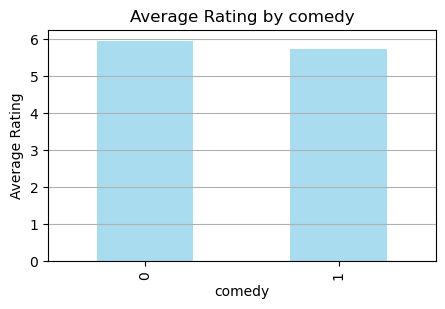

In [59]:
plt.figure(figsize=(5, 3))
df.groupby('Comedy')['Rating'].mean().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Average Rating by comedy')
plt.xlabel('comedy')
plt.ylabel('Average Rating')
plt.grid(axis='y')
plt.show()

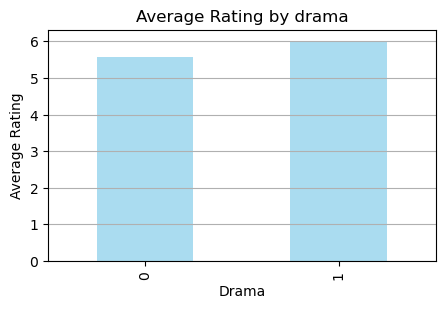

In [60]:
plt.figure(figsize=(5, 3))
df.groupby('Drama')['Rating'].mean().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Average Rating by drama')
plt.xlabel('Drama')
plt.ylabel('Average Rating')
plt.grid(axis='y')
plt.show()

In [61]:
df['Rating'].corr(df['Drama'])

0.15343490168618493

In [62]:
df['Rating'].unique()

array([4.7, 7.4, 6.2, 6.5, 7.2, 4.4, 7.3, 7.1, 5.6, 6.9, 3.5, 4.5, 8.1,
       5. , 7.7, 5.1, 7.8, 8.4, 5.7, 5.3, 6.1, 4.1, 5.4, 3.8, 5.5, 2.7,
       7.6, 6.8, 6.7, 4.2, 4.6, 4.8, 6. , 4.3, 5.8, 3.3, 5.2, 4.9, 6.3,
       7.9, 7. , 6.4, 6.6, 3.6, 3.1, 3.9, 3.2, 4. , 5.9, 8. , 3.7, 7.5,
       8.2, 8.3, 3.4, 2.9, 2.1, 2.5, 8.5, 2.3, 2.6, 8.6, 1.7, 3. , 2.4,
       1.9, 1.8, 2.8, 2. , 1.6, 2.2, 1.1, 9.3, 9.1])

In [63]:
df['Rating'].corr(df['Duration'])

0.07446950335642305

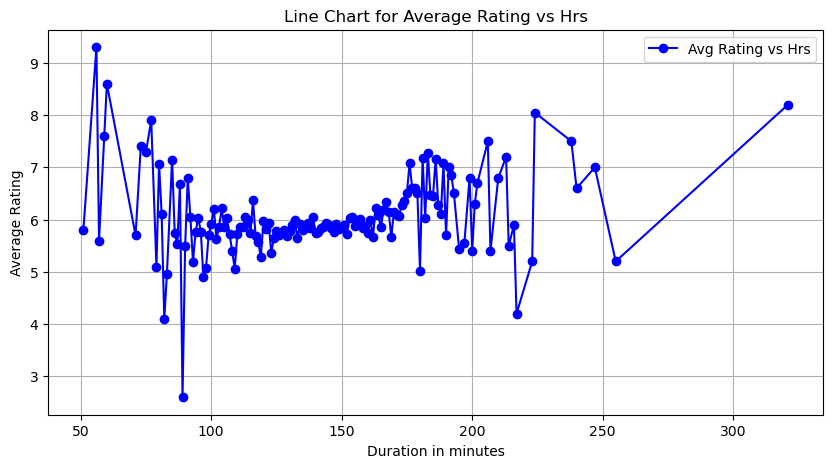

In [64]:
avg_duration_rating = df.groupby('Duration')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(avg_duration_rating['Duration'], avg_duration_rating['Rating'], marker='o', linestyle='-', color='b', label='Avg Rating vs Hrs')
plt.title('Line Chart for Average Rating vs Hrs')
plt.xlabel('Duration in minutes')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
df['Rating'].corr(df['Director_encoded'])

-0.009401866588342647

In [66]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Comedy,Drama,Romance,Action,Crime,Others,Merged_Actors,Director_encoded
2,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,1,1,0,0,0,1,Bobby Deol Aishwarya Rai Bachchan Shammi Kapoor,794
3,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,0,1,1,0,0,0,Jimmy Sheirgill Minissha Lamba Yashpal Sharma,1066
6,11.6 An Ode to Lost Love,2004,96,6.2,17,Madhu Ambat,0,1,0,0,0,0,Rati Agnihotri Gulshan Grover Atul Kulkarni,583
8,100 Days,1991,161,6.5,983,Partho Ghosh,0,0,1,0,0,0,Jackie Shroff Madhuri Dixit Javed Jaffrey,730
10,102 Not Out,2018,102,7.4,6619,Umesh Shukla,1,1,0,0,0,0,Amitabh Bachchan Rishi Kapoor Vijay Raaz,1194


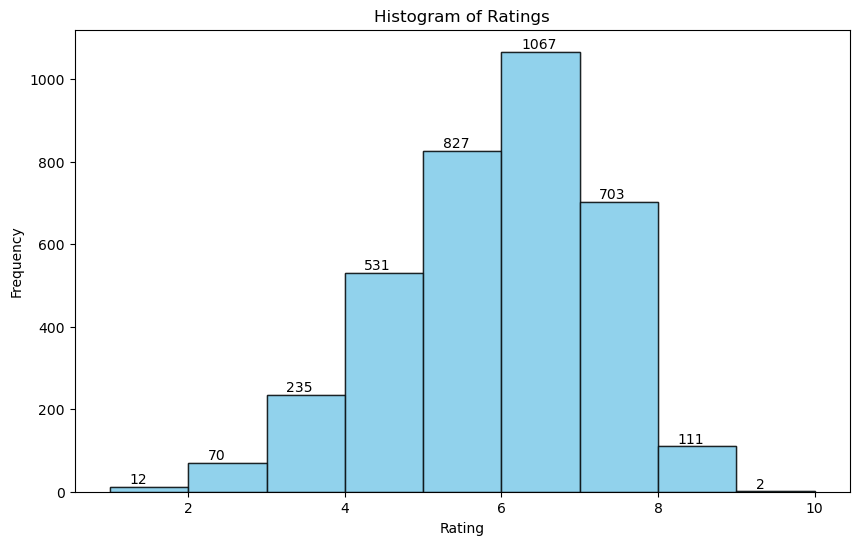

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid
hist, bins, _ = plt.hist(df['Rating'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], color='skyblue', edgecolor='black', alpha=0.7)
for count, bin_edge in zip(hist, bins):
    plt.text(bin_edge + 0.25, count, str(int(count)), va='bottom')

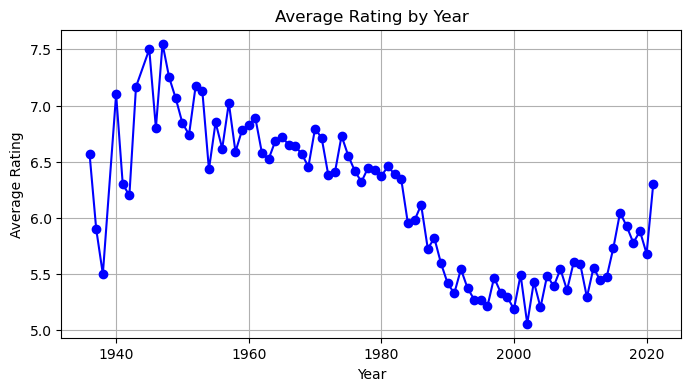

In [68]:
avg_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

# Create a line chart
plt.figure(figsize=(8, 4))
plt.plot(avg_rating_by_year['Year'], avg_rating_by_year['Rating'], marker='o', linestyle='-', color='b')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [69]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Comedy,Drama,Romance,Action,Crime,Others,Merged_Actors,Director_encoded
2,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,1,1,0,0,0,1,Bobby Deol Aishwarya Rai Bachchan Shammi Kapoor,794
3,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,0,1,1,0,0,0,Jimmy Sheirgill Minissha Lamba Yashpal Sharma,1066
6,11.6 An Ode to Lost Love,2004,96,6.2,17,Madhu Ambat,0,1,0,0,0,0,Rati Agnihotri Gulshan Grover Atul Kulkarni,583
8,100 Days,1991,161,6.5,983,Partho Ghosh,0,0,1,0,0,0,Jackie Shroff Madhuri Dixit Javed Jaffrey,730
10,102 Not Out,2018,102,7.4,6619,Umesh Shukla,1,1,0,0,0,0,Amitabh Bachchan Rishi Kapoor Vijay Raaz,1194


In [70]:
import seaborn as sns


<Axes: xlabel='Rating', ylabel='Count'>

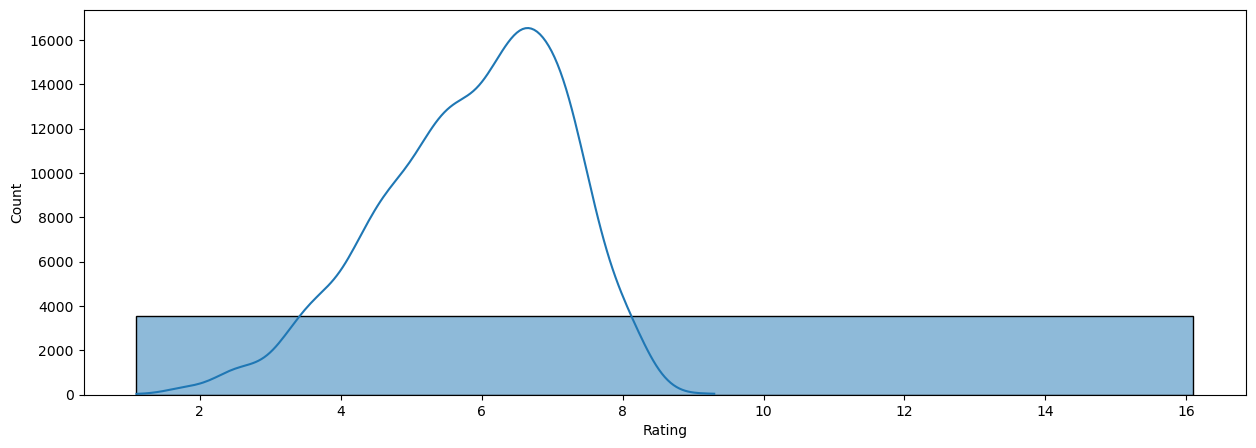

In [71]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Rating", binwidth=15,kde=True)

In [72]:
numeric_df = df.select_dtypes(include=[np.number])  # Ensure you have imported NumPy as np
correlation_with_rating = numeric_df.corr()['Rating'].sort_values()
print(correlation_with_rating)

Year               -0.326915
Action             -0.211552
Comedy             -0.075260
Crime              -0.012489
Director_encoded   -0.009402
Romance             0.018393
Duration            0.074470
Others              0.142195
Drama               0.153435
Votes               0.168611
Rating              1.000000
Name: Rating, dtype: float64


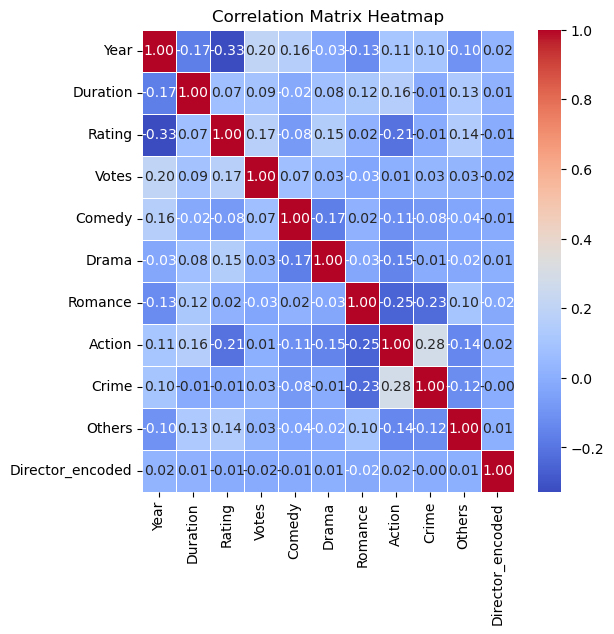

In [73]:
# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17876\3002400450.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Votes']))


<Axes: xlabel='Votes', ylabel='Density'>

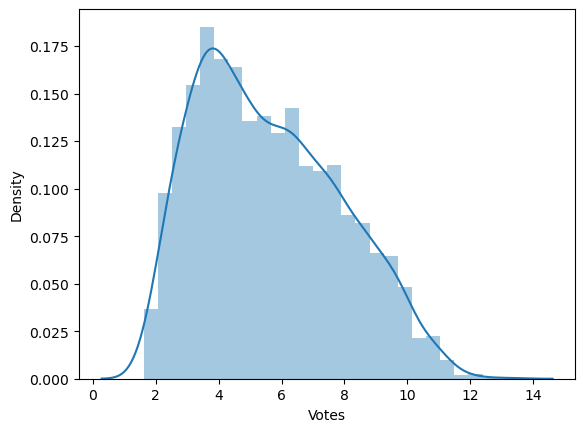

In [74]:
sns.distplot(np.log(df['Votes']))

In [75]:
input=df.drop(['Name','Merged_Actors','Director'],axis=1)
target=df['Rating']

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,
                         columns=input.columns)
scaled_df.head()

,Year,Duration,Rating,Votes,Comedy,Drama,Romance,Action,Crime,Others,Director_encoded
0,0.717647,0.355556,0.439024,0.001390,1.0,1.0,0.0,0.0,0.0,1.0,0.626183
1,0.811765,0.337037,0.768293,0.001828,0.0,1.0,1.0,0.0,0.0,0.0,0.840694
2,0.800000,0.166667,0.621951,0.000020,0.0,1.0,0.0,0.0,0.0,0.0,0.459779
3,0.647059,0.407407,0.658537,0.001654,0.0,0.0,1.0,0.0,0.0,0.0,0.575710
4,0.964706,0.188889,0.768293,0.011183,1.0,1.0,0.0,0.0,0.0,0.0,0.941640


In [77]:
X = scaled_df.drop(columns=['Rating'])
y = np.log(scaled_df['Rating'])

C:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Model Building

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
X = df[['Year', 'Others','Votes','Duration']]  # Include relevant features here
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.4858717914500932
R-squared: 0.16578855963936023


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Year', 'Others','Comedy','Drama','Romance','Votes','Duration']] # Include relevant features here
y = df['Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.1766200997191016
R-squared: 0.33941141234935457


In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Year', 'Others','Comedy','Drama','Romance','Votes','Duration']]  # Include relevant features here
y = df['Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.0665272485690218
R-squared: 0.4012207262213734


In [84]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Year', 'Others','Comedy','Drama','Romance','Votes','Duration']]
y = df['Rating']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_reg = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used
svr_reg.fit(X_train_scaled, y_train)
y_pred = svr_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 1.2647572738247983
R-squared: 0.28992865119654


## Linear reggresion is best algo 